<a href="https://colab.research.google.com/github/Bhuvansai-16/ExcelR-assignemts/blob/main/Topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np

data = pd.read_csv('Reviews.csv')

print(data.head())

data.head(20000)
data = data.dropna()
data.head()

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_df = 0.8,min_df=2,stop_words='english')
doc_term_matrix = count_vec.fit_transform(data['Text'].values.astype('U'))

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components = 5,random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [21]:
import random
for i in range(10):
  random_id = random.randint(0,len(count_vec.get_feature_names_out()))
  print(count_vec.get_feature_names_out()[random_id])

gummies
produst
yore
uh
catey13
angrily
plains
holland
ropes
mopped


In [22]:
first_topic = LDA.components_[0]

In [23]:
top_topic = first_topic.argsort()[-10:]

In [25]:
for i in top_topic:
  print(count_vec.get_feature_names_out()[i])

free
like
just
use
price
good
great
amazon
product
br


In [35]:
for i,topic in enumerate(LDA.components_):
  print(f"Top 10 words for topic")
  print([count_vec.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
  print('\n')

Top 10 words for topic
['free', 'like', 'just', 'use', 'price', 'good', 'great', 'amazon', 'product', 'br']


Top 10 words for topic
['great', 'just', 'good', 'taste', 'flavor', 'cup', 'like', 'tea', 'br', 'coffee']


Top 10 words for topic
['juice', 'just', 'drink', 'sweet', 'flavor', 'good', 'sugar', 'taste', 'like', 'br']


Top 10 words for topic
['love', 'flavor', 'bag', 'good', 'taste', 'great', 'just', 'chips', 'like', 'br']


Top 10 words for topic
['cat', 'loves', 'just', 'product', 'like', 'treats', 'dogs', 'dog', 'food', 'br']




In [31]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


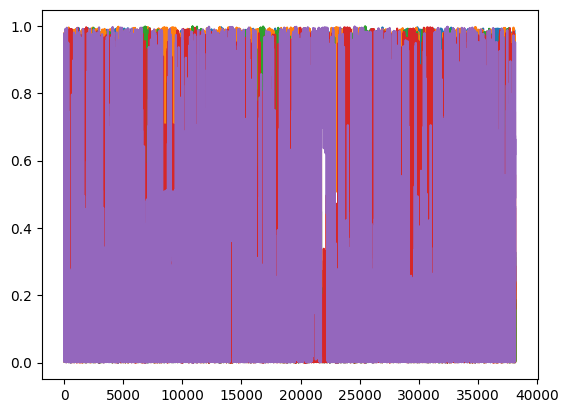

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

plt.plot(topic_values)
plt.show()